DECISION TREES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df=pd.read_csv("D:\demonic head\car_evaluation.csv",header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:

import warnings
warnings.filterwarnings('ignore')

In [6]:
col_names=['buying','maint','doors','persons','lugboot','safety','class']
df.columns=col_names
df.head()

,buying,maint,doors,persons,lugboot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
col_names=['buying','maint','doors','persons','lugboot','safety','class']
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lugboot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
df.isnull().sum()

buying     0
maint      0
doors      0
persons    0
lugboot    0
safety     0
class      0
dtype: int64

In [10]:
X=df.drop(['class'],axis=1)
y=df['class']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.33,random_state=42)

In [62]:
x_train.shape,x_test.shape

((1157, 6), (571, 6))

In [63]:
import category_encoders as ce

In [64]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lugboot','safety'])
X_train=encoder.fit_transform(x_train)
X_test=encoder.fit_transform(x_test)

FITTING + EVALUATION

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [66]:
y_pred_en=clf_en.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
print("Model score with criterion entropy:{0:0.4f}".format(accuracy_score(y_test,y_pred_en)))

Model score with criterion entropy:0.5271


In [70]:
y_pred_train_en=clf_en.predict(X_train)
print("Model score with criterion entropy:{0:0.4f}".format(accuracy_score(y_train,y_pred_train_en)))

Model score with criterion entropy:0.7865


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'x[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

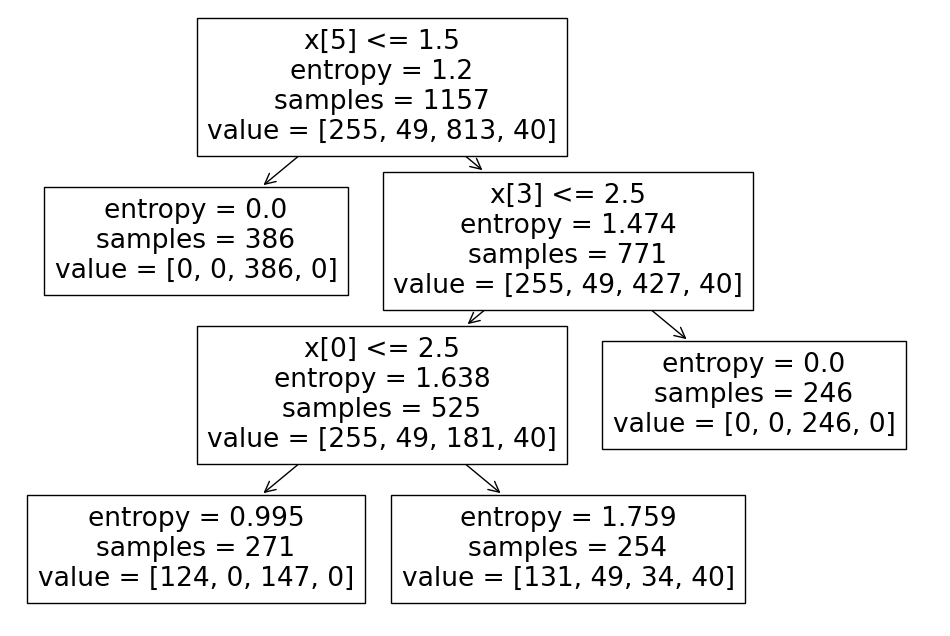

In [71]:

plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_en)
print('confusion matrix\n\n',cm)

confusion matrix

 [[ 19   0 110   0]
 [  3   0  17   0]
 [115   0 282   0]
 [  0   0  25   0]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.14      0.15      0.14       129
        good       0.00      0.00      0.00        20
       unacc       0.65      0.71      0.68       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.53       571
   macro avg       0.20      0.21      0.21       571
weighted avg       0.48      0.53      0.50       571



DONE